# MNIST classification

In [ ]:
#@title 70,000개의 손글씨 구분

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
print(mnist.keys())

print("")
X = mnist["data"]
y = mnist["target"]

print("X에 포함된 것 확인")
print(X)

print("전자는 개수, 후자는 특성의 수")
print(X.shape)
# 이때 784가 나오는 이유는 28*28 픽셀이므로 픽셀의 강도인 784이다.

print("y에 포함된 것 확인")
print(y)

print("전자는 개수, 후자는 특성의 수")
print(y.shape)

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

X에 포함된 것 확인
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
전자는 개수, 후자는 특성의 수
(70000, 784)
y에 포함된 것 확인
['5' '0' '4' ... '4' '5' '6']
전자는 개수, 후자는 특성의 수
(70000,)


<function show at 0x7f162478bb00>
5


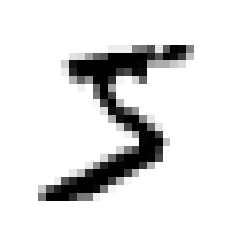

In [ ]:
#@title 함수로 호출해서 그림 그리기

import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
import numpy as np

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
print(plt.show)

print(y[0])
# 5번 class로 분류하는 것을 확인

In [ ]:
#@title 데이터를 자세히 조사히기 전 testset 만들기

X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

# 이때 위에서 dataset이 70000개인 것을 확인해서 이렇게 바꾼것.
# 다른 값 실험해보기

In [ ]:
#@title 이진 분류기 훈련

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
# string 변수인 '5'인 것을 확인

# y값이 5인 train set과 test set을 구분

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

In [ ]:
#@title 교차 검증 Cross Validation
#우리가 만들 분류기가 잘 분류하는 분류기인지 test하는 성능 지표들
# 4가지가 존재
# 교차검증, 오차행렬, 정밀도, 재현도, ROC curve 존재

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")
# 3가지로 분류하는데 각각의 성능지표가 95%, 96%, 96%로 정확한 것을 알 수 있음.

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
#@title 내가 만든 Cross Validation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5) :
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

# skfolds는 스플릿을 3으로 주었기 때문에 for문에서 3개가 돈다.
# 변수는 확인하고 잘 돌리길 모르겠으면 교차검증 위에 있는 cross_val_score 사용하자.

0.95035
0.96035
0.9604


In [ ]:
#@title 더미분류기를 활용하여 5 아님으로 분류하기

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring = "accuracy")

False


array([0.90965, 0.90965, 0.90965])

In [ ]:
#@title 더미분류기의 다른 예제
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator) :
  def fit(self, X, y=None):
    return self
  def predict(self, X) :
    return np.zeros((len(X),1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring="accuracy")
# 더미 분류기는 알아서 사용하면 된다.

array([0.91125, 0.90855, 0.90915])

In [ ]:
#@title 오차행렬 Confusion Metrix

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3 )

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
print(cm)
# TN, FP
# FN, TP 이다.

# 아래의 완벽한 분류기에서는 FP, FN이 0인것을 확인할 수 있다.
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)


[[53892   687]
 [ 1891  3530]]


array([[54579,     0],
       [    0,  5421]])

In [ ]:
#@title 정밀도(Precision) & 재현율(Recall) & 조화평균인 F1 점수

#위 표에서 참고하여 정밀도 = (TP)/(TP+FP)
# 재현율 = (TP)/(TP+FN)

from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

# 여기는 조화 평균
from sklearn.metrics import f1_score

print(f1_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311
0.7325171197343846


In [ ]:
#@title Confusion Metrix = cm을 이용한 정밀도 & 재현율 & 조화평균

print("이것은 Precision : ", cm[1, 1]/(cm[0, 1]+cm[1, 1]))
print("")
print("이것은 Recall : ", cm[1, 1]/(cm[1, 0]+ cm[1, 1]))
print("")
print("이것은 f1 score : ", cm[1, 1]/(cm[1, 1]+(cm[1, 0] + cm[0, 1])/2))

print("결과가 위 함수 사용과 동일한 것을 확인할 수 있다.")

이것은 Precision :  0.8370879772350012

이것은 Recall :  0.6511713705958311

이것은 f1 score :  0.7325171197343847
결과가 위 함수 사용과 동일한 것을 확인할 수 있다.


[2164.22030239]
[ True]
[False]

임계값이 0일 때는, 2000점이 넘으므로 점수를 2164이니 True라고 분류한다.
하지만 임계값이 8000이 된다면 점수를 못넘겨서 False라고 분류한다.
임계값을 높이면 재현율이 줄어든다는 것을 보여주고, 적절한 임계값을 찾아야한다.
그것을 위해서는 모든 샘플의 점수를 구해야 한다. 여기서는 결정 점수를 반환받아 사용한다.

trade-off 되는 그래프 그리기 위한 함수 선언과 실행


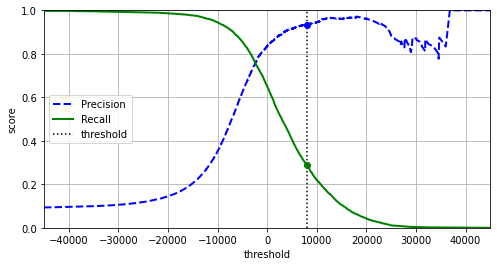

None


In [ ]:
#@title Precision/Recall Trade-Off
# 사이킷런에서 정밀도와 재현율의 tradeoff 관계를 확인할 수 있는데
# 그 경계값을 확인할 수는 없다.
# 그러나 예측에 사용한 점수는 확인이 가능하다.
# 분류기의 predict() method대신 decision_function() method를 사용하면
# 각 샘플의 점수를 얻을 수 있고,
# 이 점수를 기반으로 원하는 임곗값을 정해 예측을 만들 수 있다.

# 여기서 some_digit은 X[0]에 들어있는 값이다. 조정 가능
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)

# threshold는 임계값으로 변수 선언한 것.
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)
# 임계값보다 y_score가 크냐를 확인.

# 여기서 임계값을 올린다면
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)
# 임계값보다 작은 것을 알 수 있다.

print("")
print("임계값이 0일 때는, 2000점이 넘으므로 점수를 2164이니 True라고 분류한다.")
print("하지만 임계값이 8000이 된다면 점수를 못넘겨서 False라고 분류한다.")
print("임계값을 높이면 재현율이 줄어든다는 것을 보여주고, 적절한 임계값을 찾아야한다.")
print("그것을 위해서는 모든 샘플의 점수를 구해야 한다. 여기서는 결정 점수를 반환받아 사용한다.")

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method ="decision_function")
# 이 점수로 아래 함수에 대입하여 모든 임계값에 대한 정밀도와 재현율을 계산한다.
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

print("")
print("trade-off 되는 그래프 그리기 위한 함수 선언과 실행")
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds) :
  plt.figure(figsize=(8,4))
  # 표 자체의 사이즈를 조절해주는 것
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth = 2)
  plt.plot(thresholds, recalls[:-1], "g-", label = "Recall", linewidth = 2)
  plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
  # 그래프 내의 선, 파란선, 초록선, 점선 표시해주고 labeling해주는 과정

  idx = (thresholds >= threshold).argmax()
  # 그래프에서 threshold를 thresholds가 처음으로 넘는 지점 표시
  plt.plot(thresholds[idx], precisions[idx], "bo")
  plt.plot(thresholds[idx], recalls[idx], "go")
  # 위에서 선언한 값을 최초로 넘는 precision과 recall지점 표시
  plt.axis([-45000,45000, 0, 1])
  # x축 y축 scaling
  plt.grid()
  # 뒤에 보조 실선 표시
  plt.xlabel("threshold")
  plt.ylabel("score")
  # x축, y축 이름 표시
  plt.legend(loc = "center left")
  # 가운데 상자 무슨 내용인지 표시, 방향 설정 가능


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
print(plt.show())

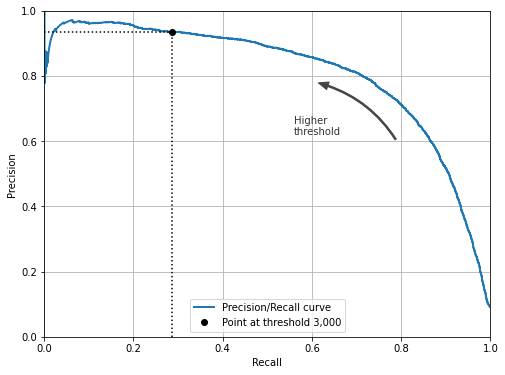

None


In [ ]:
#@title Precision - Recall graph

# 위에는 threshold(임계값)에 대한 Precision과 Recall그래프를 다 표시한 것.
# 아래는 Precision - Recall 사이의 그래프를 표시하는게 좋음.
# 이 그래프로도 Trade-off 되는 것을 확인 가능

import matplotlib.patches as patches
# 그래프 가운데 화살표 넣어주기 위해서 넣는 코드

def plot_Precision_vs_recall_curve (precisions, recalls, thresholds) :
  idx = (thresholds>=threshold).argmax()
  plt.figure(figsize = (8, 6))
  plt.plot(recalls, precisions, linewidth = 2, label = "Precision/Recall curve")

  plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
  plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
  plt.plot ([recalls[idx]], [precisions[idx]], "ko",
            label = "Point at threshold 3,000")
  plt.gca().add_patch(patches.FancyArrowPatch(
      (0.79, 0.60), (0.61, 0.78),
      connectionstyle = "arc3, rad=.2",
      arrowstyle="Simple, tail_width=1.5, head_width=8, head_length = 10",
      color="#444444"))
  plt.text(0.56, 0.62, "Higher\nthreshold", color = "#333333")
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.axis([0, 1, 0, 1])
  plt.grid()
  plt.legend(loc = "lower center")

plot_Precision_vs_recall_curve(precisions, recalls, thresholds)
print(plt.show())

In [ ]:
#@title Precision의 목표가 있을 때 조정하는 방법

# 최소한 90%의 정밀도를 만드는 가장 낮은 임계값을 찾는 방법.
# np.argmax()의 경우 최댓값의 첫 번째 인덱스를 반환해준다.
import numpy as np

threshold_90_precision = thresholds[np.argmax( precisions >=0.90)]
# 이 함수 안에 0.90을 바꿔주면 목표치를 변경할 수 있다.
y_train_pred_90 = (y_scores >= threshold_90_precision)
print(threshold_90_precision)

print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))
print("")
print("이 외에도 다른 방법이 있다.")

idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
print(threshold_for_90_precision)

y_train_pred_90 = (y_scores >= threshold_for_90_precision)
print(precision_score(y_train_5, y_train_pred_90))

recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
print(recall_score(y_train_5, y_train_pred_90))

3370.0194991439557
0.9000345901072293
0.4799852425751706

이 외에도 다른 방법이 있다.
3370.0194991439557
0.9000345901072293
0.4799852425751706


None


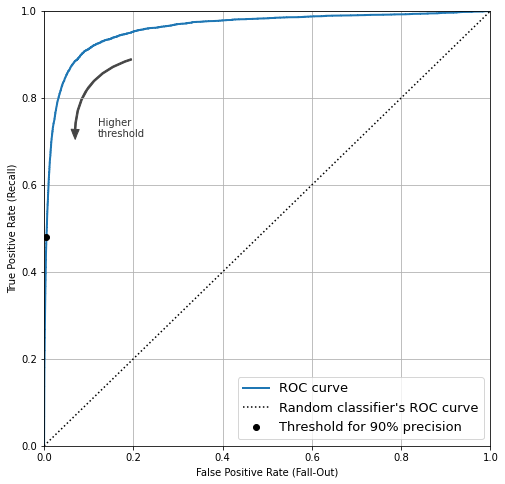

In [ ]:
#@title ROC Curve
# 거짓 양성비율에 대한 진짜 양성 비율을 의미하며
# 거짓 양성 비율 = FPR, 양성으로 잘못 분류된 음성 샘플의 비율
# 진짜 음성 비율 = TNR, 특이도 : 음성으로 정확하게 분류된 음성 샘플의 비율
# 진짜 양성 비율 = TPR, 재현율 : 양성으로 정확하게 분류된 양성 샘플의 비율
# 거짓 음성 비율 = FNR, 음성으로 잘못 분류된 양성 샘플의 비율

from sklearn.metrics import roc_curve

import matplotlib.patches as patches
# 그래프 가운데 화살표 넣어주기 위해서 넣는 코드

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

def plot_fpr_vs_tpr_curve ( fpr, tpr, label = None) :
  plt. figure(figsize=(8,8))
  plt.plot(fpr, tpr, linewidth = 2, label ="ROC curve")
  plt.plot([0,1], [0, 1], 'k:', label="Random classifier's ROC curve")
  plt.plot([fpr_90], [tpr_90], "ko", label = "Threshold for 90% precision")

  plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
  plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
  plt.xlabel('False Positive Rate (Fall-Out)')
  plt.ylabel('True Positive Rate (Recall)')
  plt.grid()
  plt.axis([0, 1, 0, 1])
  plt.legend(loc="lower right", fontsize=13)

print(plot_fpr_vs_tpr_curve(fpr, tpr))

0.9604938554008616
[[0.11 0.89]
 [0.99 0.01]]

 94.0%

랜덤 포레스트의 분류기가 SGD 분류기보다 AUC가 더 좋은 것을 확인하는 그래프
None


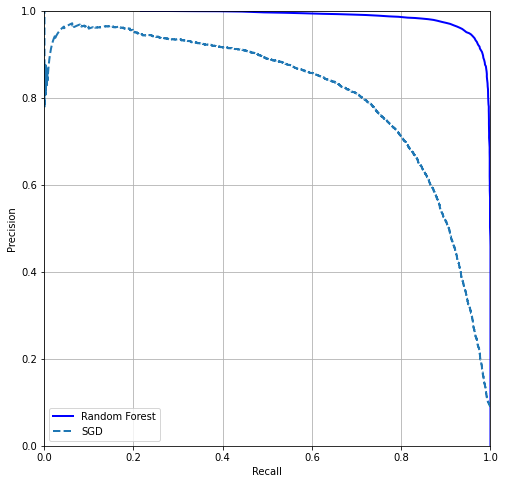

In [ ]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve
#@title 곡선 아래의 면적 AUC
# 완벽한 분류기에서 AUC는 1이고, 완전한 랜덤 분류기는 0.5이다.

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5, y_scores))

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3,
                                    method = "predict_proba")
print(y_probas_forest[:2])

print("")
# 모델이 50%, 60% 사이의 확률로 양성으로 분류한 이미지 중 94%의 양성이미지가 있다.
idx_50_to_60 = (y_probas_forest[:, 1]>0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum()/idx_50_to_60.sum(): .1%}")
print("")
print("랜덤 포레스트의 분류기가 SGD 분류기보다 AUC가 더 좋은 것을 확인하는 그래프")
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

def plot_recall_vs_precision_curve (fpr_forest, tpr_forest, thresholds_forest) :
  plt.figure(figsize=(8,8))
  plt.plot(fpr_forest, tpr_forest, "b-", linewidth=2, label="Random Forest")
  plt.plot(recalls, precisions, "--", linewidth=2, label ="SGD")

  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.axis([0, 1, 0, 1])
  plt.grid()
  plt.legend(loc="lower left")

print(plot_recall_vs_precision_curve(fpr_forest, tpr_forest, thresholds_forest))

In [ ]:
#@title 추정된 확률을 갖고 있으므로 임계값을 50%로 지정한다.
# 예측을 더 빨리 할 수 있음.

y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
# 위 0.5를 바꾸면 값을 바꿀 수 있음
print("50% 추정값 사용시 f1 = ",f1_score(y_train_5, y_train_pred_forest))

print("50% 추정값 사용시 AUC = ",roc_auc_score(y_train_5, y_scores_forest))
print("50% 추정값 사용시 Precision = ",precision_score(y_train_5, y_train_pred_forest))
print("50% 추정값 사용시 Recall = ",recall_score(y_train_5, y_train_pred_forest))

50% 추정값 사용시 f1 =  0.9274509803921569
50% 추정값 사용시 AUC =  0.9983436731328145
50% 추정값 사용시 Precision =  0.9897468089558485
50% 추정값 사용시 Recall =  0.8725327430363402


# Multiclass Classification (다중 분류)

In [ ]:
#@title 0~9까지 분류하는 방법 2가지
# OvR(OvA)의 경우 이진 분류기 10개로 클래스가 10개인 숫자 이미지 분류
# OvO의 경우 0vs1, 0vs2 ... 9vs9로 총 45개의 클래스로 분류
# 이때 OvO의 경우 45개 분류기 모두를 통과시켜 가장 많이 양성으로 분류된 클래스를 사용.
# 장점 : 각 분류기의 훈련에 전체 훈련 세트 중 포함된 2개의 클래스에 해당하는 샘플만 사용

# 대부분의 이진 알고리즘은 OvR 선호, SVM같은 경우는 OvO선호
# 그래서 SVM에서 OvO 어떻게 돌아가는지 확인할 것.

# 그런데 SVM을 그냥 출력하게 되면 기본값인 OvR로 돌아감.
print("SVM OvR분류기")
print("")
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

# 일단 2000개만 사용해서 SVM 돌리기

svm_clf.predict([some_digit])

some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)
print("X[0]인 some_digit의 분류기 별 점수 =  ")
print(some_digit_scores)

print("")

class_id = some_digit_scores.argmax()
print("구분된 클래스 : ",class_id)
print("")
print("분류기 내 존재하는 class 들 확인 : ")
print(svm_clf.classes_)
print("")
print("분류된 클래스의 값",svm_clf.classes_[class_id])


SVM OvR분류기

X[0]인 some_digit의 분류기 별 점수 =  
[[ 3.79297828  0.72949369  6.06184129  8.29800527 -0.29383983  9.30157597
   1.74723215  2.77365456  7.20601456  4.82245092]]

구분된 클래스 :  5

분류기 내 존재하는 class 들 확인 : 
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']

분류된 클래스의 값 5


In [ ]:
#@title SVM OvO로 강제하는 방법

svm_clf.decision_function_shape = "OvO"
some_digit_scores_OvO = svm_clf.decision_function([some_digit])
some_digit_scores_OvO.round(2)

print(some_digit_scores_OvO)

from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000],y_train[: 2000])

print(ovr_clf.predict([some_digit]))
print(len(ovr_clf.estimators_))

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

print(sgd_clf.decision_function([some_digit]).round())

print(cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring="accuracy"))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
print(cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy"))



[[ 0.11314332 -0.21144362 -0.97226923  0.50926537 -1.00524263  0.18971803
   0.08767314 -0.31096994 -0.03885061 -0.45175117 -1.28080687  0.25210289
  -1.00847383 -0.12725616 -0.31581733 -0.89588797 -0.36453921 -0.92588341
   0.78675875 -0.99974949  0.45303827  0.2427903  -0.23896814  0.24660197
   1.54035119 -0.76999021  1.10914098  1.13399179  1.04030548  1.20260951
  -1.42133177 -0.53302981 -0.45416354 -0.98961137 -0.95359226  1.21202449
   0.99995787  1.00013239  1.07935139 -0.0180567  -0.67167471 -0.14405376
  -0.30458887 -0.13465288  0.24683723]]
['5']
10
[[-31893. -34420.  -9531.   1824. -22320.  -1386. -26189. -16148.  -4604.
  -12051.]]
[0.87365 0.85835 0.8689 ]
[0.8983 0.891  0.9018]


# Error Analysis (오류분석)

1번 흑백 matrix [[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]

2번 방법으로 matrix 표현하기


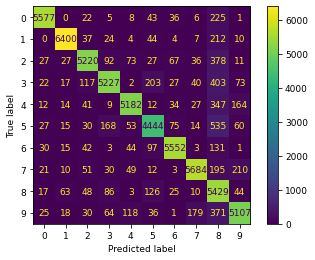

In [ ]:
#@title 모델의 성능을 향상시키기 위한 오류 분석

# 오차 행렬을 통해 에러 종류 분석하기
# cross_val_predict()함수를 이용하여 예측하고
# confusion_matrix() 함수를 호출한다

from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
plt.rc('font', size = 9)

conf_mx = confusion_matrix(y_train, y_train_pred)
print("1번 흑백 matrix",conf_mx)

print("")
print("2번 방법으로 matrix 표현하기")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()


1번 conf mx를 그래프화 한것


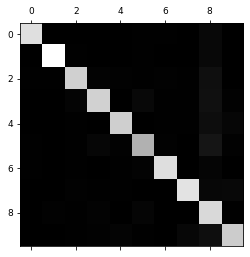


2번 matirx를 직관적으로 변형한 것


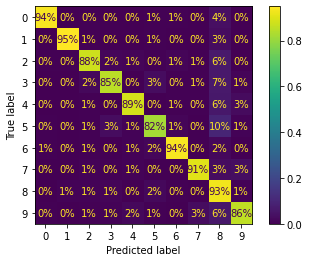

In [ ]:
#@title 위에서 나온 graph를 비율로 변경

print("1번 conf mx를 그래프화 한것")
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

print("")
print("2번 matirx를 직관적으로 변형한 것")
plt.rc('font', size = 10)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred, normalize= "true", values_format = ".0%")
plt.show()

1번 conf mx의 주대각선을 0으로


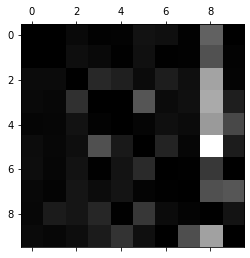


2번 그래프의 주대각선을 0으로


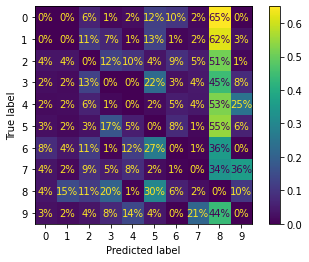

In [ ]:
#@title 주대각선을 0으로 변경하고 그래프의 비율을 환산한다.
import numpy as np

print("1번 conf mx의 주대각선을 0으로")
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

print("")
print("2번 그래프의 주대각선을 0으로")
sample_weight = (y_train_pred != y_train)
plt.rc('font', size = 10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight = sample_weight,
                                        normalize = "true", values_format =".0%")
plt.show()

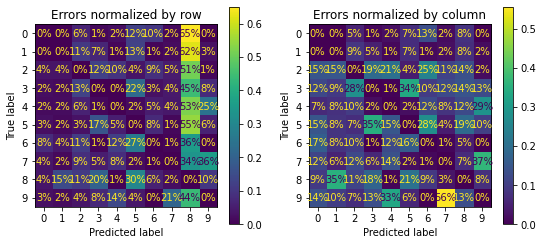

In [ ]:
#@title 이거는 그냥 2개 그래프 합친 것.

# extra code – this cell generates and saves Figure 3–10
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()
plt.rc('font', size=14)  # make fonts great again

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


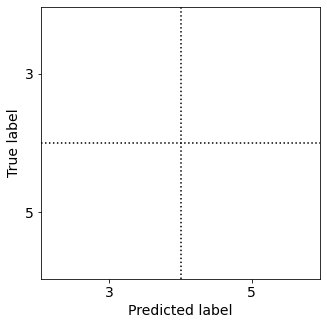

 이것을 확인해보면, 3과 5가 비슷한 것이 보임. 28*28 픽셀 내에서 구분하기 힘든 것이 있음.
 특히 둘을 비교하려면 2가지, 위쪽 선과 아래쪽 호를 비교하는데 이게 비슷하면 잘 안보임.


In [ ]:
#@title 3과 5의 샘플을 통하여 왜 분류가 잘못됐는지 평가하기

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.show()


print(" 이것을 확인해보면, 3과 5가 비슷한 것이 보임. 28*28 픽셀 내에서 구분하기 힘든 것이 있음.")
print(" 특히 둘을 비교하려면 2가지, 위쪽 선과 아래쪽 호를 비교하는데 이게 비슷하면 잘 안보임.")

# Multilabel Classification (다중 레이블 분류)

In [ ]:
#@title 같은 사진에 여러명이 등장한 경우

# 위에서는 각 샘플이 하나의 클래스에만 할당했음. 이제는 같은 사진에 3명의 등장하면
# 어떻게 분류해야 하는지 보여줌

import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([some_digit])

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")
print("여기는 f1 socre의 평균 계산 : ",f1_score)
f1_score(y_multilabel, y_train_knn_pred, average="weighted")
print("여기서 주는 것은 클래스의 support를 가중치로 주는 것이다.",f1_score)

여기는 f1 socre의 평균 계산 :  <function f1_score at 0x7f23831ba9e0>
여기서 주는 것은 클래스의 support를 가중치로 주는 것이다. <function f1_score at 0x7f23831ba9e0>


# Multioutput Classification (다중 출력 분류)

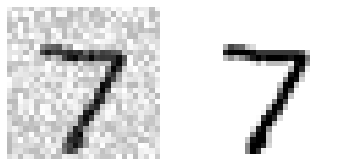

In [ ]:
#@title 다중 클래스가 될 수 있도록 일반화 한 것이다.

from sklearn.multioutput import ClassifierChain
import numpy as np

chain_clf = ClassifierChain(SVC(), cv = 3, random_state = 42)
chain_clf.fit(X_train[: 2000], y_multilabel[: 2000])

chain_clf.predict([some_digit])

np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])

plt.show()

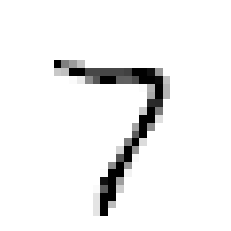

In [ ]:
#@title noise 첨가한 것을 다시 noise 없애기

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)

plt.show()